In [14]:
import pandas as pd

# Load data
data = pd.read_csv('../exploratory-data-analysis/data.csv')

# Parse the date and create new features
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Aggregate the data to count outages per month, type, and class
aggregated_data = data.groupby(['year', 'month', 'type', 'class']).size().reset_index(name='num_outages')

# One-hot encode categorical variables
aggregated_data = pd.get_dummies(aggregated_data, columns=['type', 'class'])

# Display the processed dataframe
print(aggregated_data.head())

   year  month  num_outages  type_ALECO  type_BATANELCO  type_IEC   
0  2018      4            1       False           False     False  \
1  2018      5          103       False           False     False   
2  2018      6          122       False           False     False   
3  2018      7          137       False           False     False   
4  2018      8          103       False           False     False   

   type_ISELCOII  type_MASELCO  type_MERALCO  type_OEDC  type_PANELCO3   
0          False         False          True      False          False  \
1          False         False          True      False          False   
2          False         False          True      False          False   
3          False         False          True      False          False   
4          False         False          True      False          False   

   class_Private  class_Public  
0           True         False  
1           True         False  
2           True         False  
3       

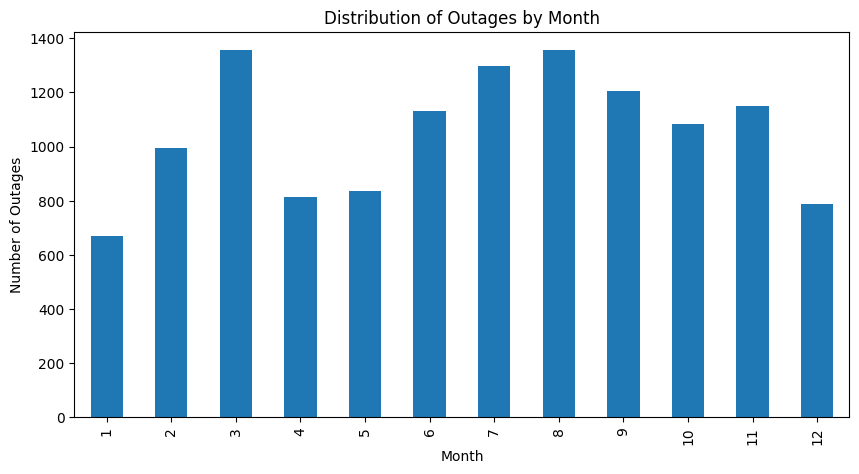

In [16]:
import matplotlib.pyplot as plt

# Plot the distribution of outages by month
plt.figure(figsize=(10, 5))
data['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Outages by Month')
plt.xlabel('Month')
plt.ylabel('Number of Outages')
plt.show()


In [17]:
# Define features and target
X = aggregated_data.drop(columns=['num_outages'])
y = aggregated_data['num_outages']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_absolute_error')

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print(f'Best Parameters: {best_params}')

# # Train the best model
# best_rf_regressor = grid_search.best_estimator_
# y_pred_best_rf = best_rf_regressor.predict(X_test)

# # Evaluate the best model
# mae_best = mean_absolute_error(y_test, y_pred_best_rf)
# mse_best = mean_squared_error(y_test, y_pred_best_rf)
# rmse_best = mse_best ** 0.5

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Model Mean Absolute Error: 14.041515316487356
Best Model Mean Squared Error: 404.71289901745234
Best Model Root Mean Squared Error: 20.117477451645183


In [26]:
# Example input for prediction
input_data = {
    'year': [2026],
    'month': [4],
    'type_MERALCO': [0],
    'type_AnotherType': [0],
    'class_Public': [1],
    'class_Private': [0]
}
input_df = pd.DataFrame(input_data)

# Ensure all necessary columns are present
for col in X.columns:
    if col not in input_df.columns:
        input_df[col] = 0  # Fill missing columns with 0

# Ensure the columns are in the same order
input_df = input_df[X.columns]

# Predict
predicted_num_outages = rf_regressor.predict(input_df)
print(f'Predicted number of outages: {predicted_num_outages[0]}')


Predicted number of outages: 20.45
